In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
hf = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
hf

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Variables in the dataset

Age: This column tells about the age of the person

Sex : This column Represents the sex type of the person

BMI: This column Abbreviated as Body mass index which gives the bmi value for each person  with respect to his/her height and weight. Bmi value is the understaing of our body wrt height and weight relatively low or high. Ideal values ie between 18.5 to 24.9.

Children: This column gives us how may children does a person have

smoker: This column tells about whether the person is smoker or not

region: This column tells us about which region of the country does the person belong to

Charges: This column gives us the insurance cost for each person

In [3]:
print("The no of rows and columns in our dataset :", hf.shape, "\n")
print("The column names of the dataset:", hf.columns)

The no of rows and columns in our dataset : (1338, 7) 

The column names of the dataset: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


The dataset contains 1338 rows and 7 columns. One column being the target variable and remaining 6 are features

### Non Graphical analysis

In [4]:
# data types
hf.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

The dataset contains three types of datatypes: int64, float64, object

In [5]:
#Checking for null values in the dataset
hf.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values in the dataset

In [6]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The info() method gives us the brief information such as range index, data columns, non null count and datatypes about the dataset 

<AxesSubplot:>

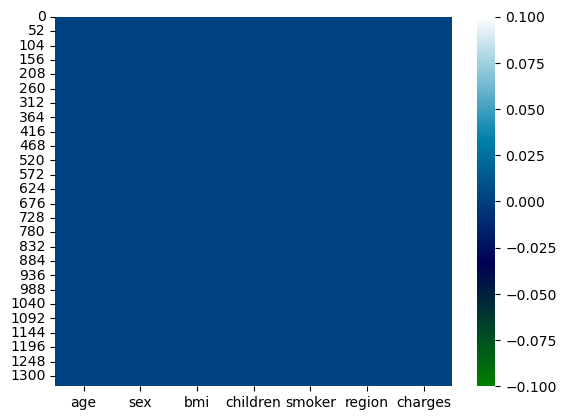

In [7]:
# Visualising the null values if exists any
sns.heatmap(hf.isnull(), cmap = 'ocean')

By the above heatmap we can say that there are no null values

In [8]:
hf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# Checking for no of unique values in all the columns
for i in hf.columns:
    print(hf[i].value_counts().sort_values())
    print('\n')

64    22
61    23
62    23
63    23
60    23
39    25
35    25
38    25
36    25
58    25
59    25
37    25
32    26
33    26
55    26
34    26
56    26
57    26
41    27
40    27
31    27
44    27
42    27
30    27
43    27
29    27
49    28
54    28
53    28
21    28
22    28
24    28
25    28
28    28
27    28
23    28
26    28
52    29
48    29
20    29
45    29
46    29
47    29
51    29
50    29
19    68
18    69
Name: age, dtype: int64


female    662
male      676
Name: sex, dtype: int64


30.970     1
33.200     1
18.600     1
33.550     1
40.375     1
          ..
31.350     8
30.875     8
30.495     8
28.310     9
32.300    13
Name: bmi, Length: 548, dtype: int64


5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64


yes     274
no     1064
Name: smoker, dtype: int64


northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64


3943.59540     1
3756.62160     1
8240.58960     1
7281.50560     1
6406.41070  

Based on the value couunts of each column we can say that age group ranges from 18 to 64, no of chidrens ranges from 0 to 5 hence data type of it should be changes to object, no of smokers and non smokers, no of regions are 4 and charges for each person varies.

In [11]:
hf.children = hf.children.astype(object)
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


In [12]:
# Checking for any duplicate values
hf.duplicated().value_counts()

False    1337
True        1
dtype: int64

We can see that there is one duplicate value in our dataset. So we can remove the duplicate data

In [13]:
# removing duplicate value
hf = hf.drop_duplicates()
hf.duplicated().sum()

0

Removed one duplicate value from our dataset using drop_duplicates()

In [14]:
#Statistical summary of the  numerical columns of the dataset
hf.describe()

,age,bmi,charges
count,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,13279.121487
std,14.044333,6.100468,12110.359656
min,18.000000,15.960000,1121.873900
25%,27.000000,26.290000,4746.344000
50%,39.000000,30.400000,9386.161300
75%,51.000000,34.700000,16657.717450
max,64.000000,53.130000,63770.428010


The describe() method gives us the statistical summary of the dataset.

The count of values of all the columns are same, hence we can say that there are no missing values.

The median(50%) of the charges column is less than the mean value of it. Hence we can say that the data is skewed right. But since it is a target variable normalising the data is not necessary

There is difference between 75% value and max value in bmi and charges column. This says that the outliers exist in these columns. 

The above summary also gives us the standard deviation values , minimum values, 25% percentile values, max values in the dataset

#### Univariate analysis

Dividing the columns into categorical and numerical

In [15]:
features = ['sex', 'children', 'smoker', 'region']
cat = []
num = []
for i in hf.dtypes.index:
    if hf.dtypes[i] == 'object':
        cat.append(i)
    else:
        num.append(i)

print(cat)
print(num)

['sex', 'children', 'smoker', 'region']
['age', 'bmi', 'charges']


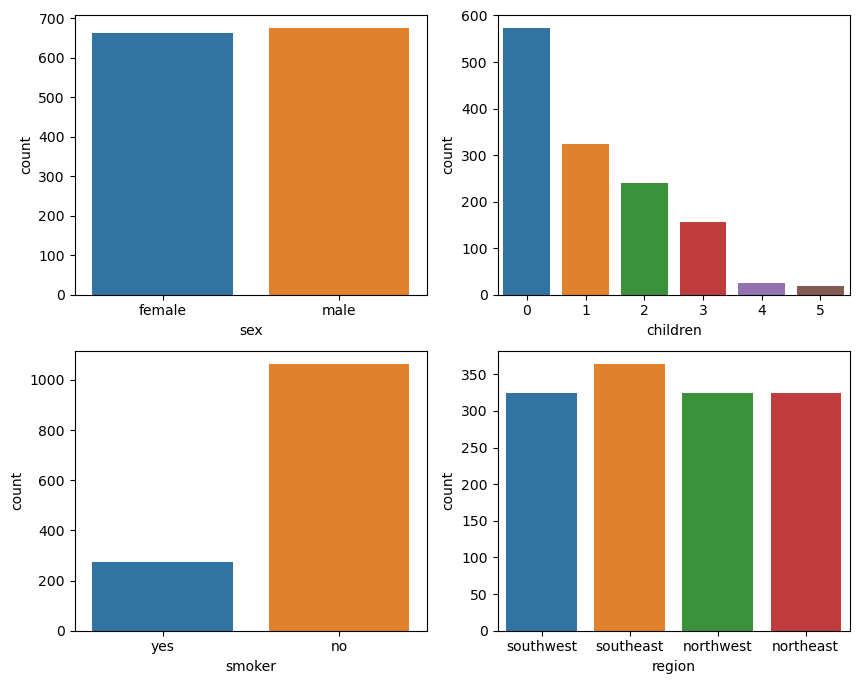

In [16]:
plt.figure(figsize = (10,8))
c = 1
for i in enumerate(cat):
    if c<5:
        plt.subplot(2,2,c)
        sns.countplot(x = i[1], data = hf)
        plt.xticks(rotation = 0)
    c+=1
plt.show()    

From the above plot we can observe that the dataset contaiins both male and female customers,

isurance buyers with 0 children are more when compared to having 1, 2, 3 children and having 4 and 5 childrens are less who bought an insurance.

The insurance buyers who are non smoker are more when compared to smokers so we can say that smooker column is essential for charges predicting.

Customers from southeast region are more when compared to all other regions.


In [17]:
# from sklearn.preprocessing import LabelEncoder
# lab = LabelEncoder()
# hf['sex'] = lab.fit_transform(hf['sex'])
# hf['smoker'] = lab.fit_transform(hf['smoker'])
# hf['region'] = lab.fit_transform(hf['region'])
# hf

Since we need to check the correlation betwen all the columns and some columns were categorical in nature we have encode the columns data using LabelEncoder technique. Now we can check the relation between the columns

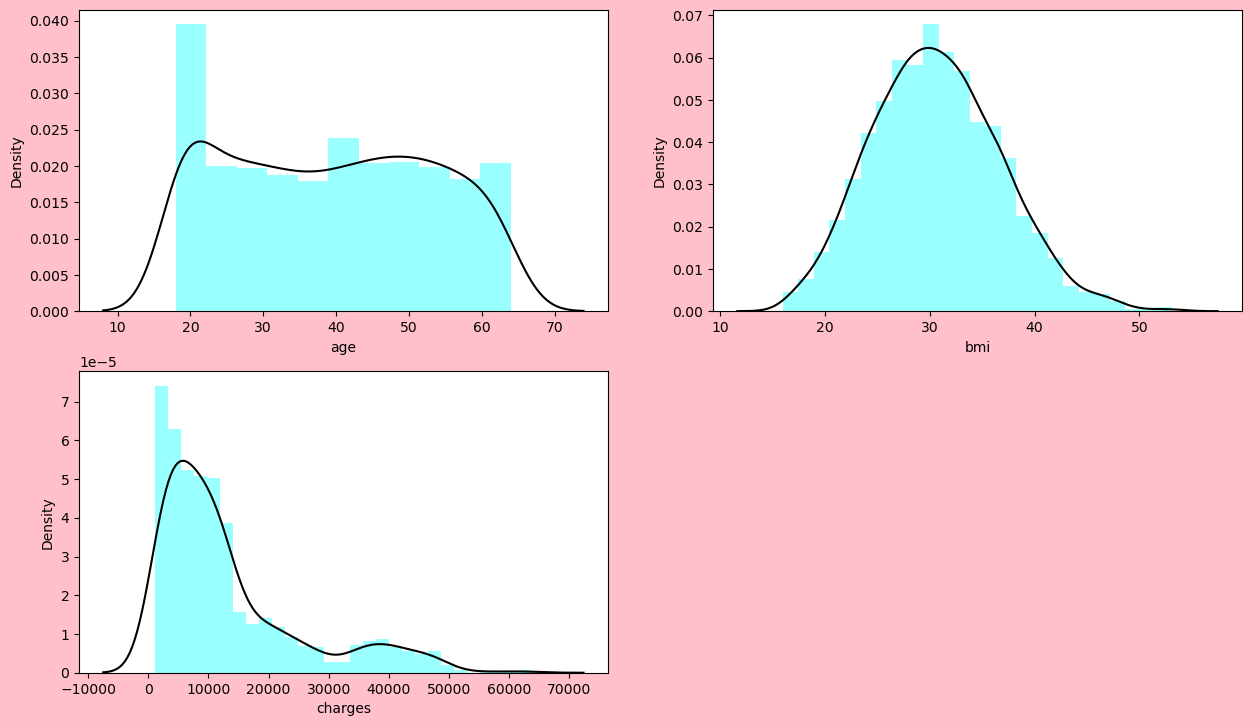

In [18]:
plt.figure(figsize = (15,18), facecolor = 'pink')
c = 1
for i in num:
    if c<= 7:
        plt.subplot(4,2, c)
        sns.distplot(hf[i], color = 'cyan', kde = True,kde_kws = {'color':'black'})
        plt.xlabel(i, fontsize = 10)
    c+=1
plt.show()

From the above distribution plot we can say that the age column and bmi columns almost normal and the charges is skewed to right, however there are skeweness is becuase of the charges variations. So no need to normalise it

In [19]:
hf.skew()

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

From skew() method we can see that age and bmi in the default skew range(-0.5 to 0.5) hence we can say that the data is almost normal. Children column is categorical column even though it got numerical valuesand the skeweness of this column not considered

#### Bivariate Analysis

<Figure size 1000x800 with 0 Axes>

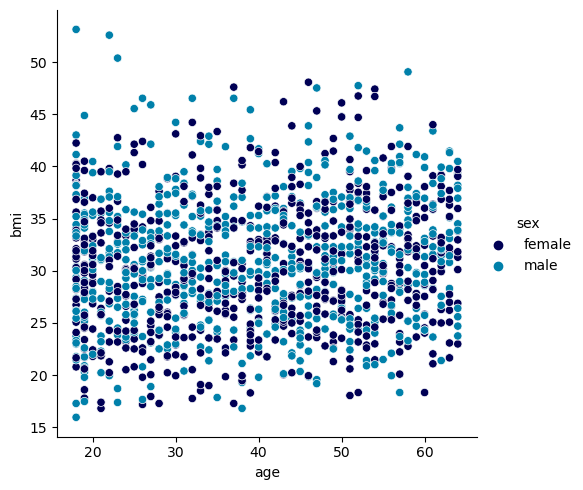

In [20]:
plt.figure(figsize = (10,8))
sns.relplot(x = 'age', y = 'bmi', data = hf, hue = 'sex', palette = 'ocean')
plt.show()

<Figure size 1000x1200 with 0 Axes>

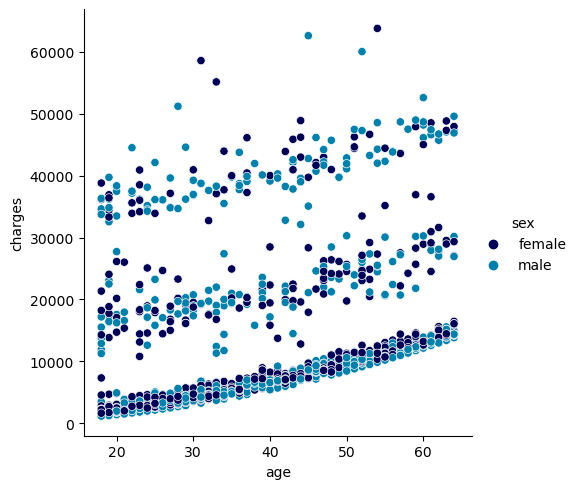

In [21]:
plt.figure(figsize = (10,12))
sns.relplot(x = 'age', y = 'charges', hue = 'sex',data = hf,palette = 'ocean')
plt.show()

<Figure size 1000x1200 with 0 Axes>

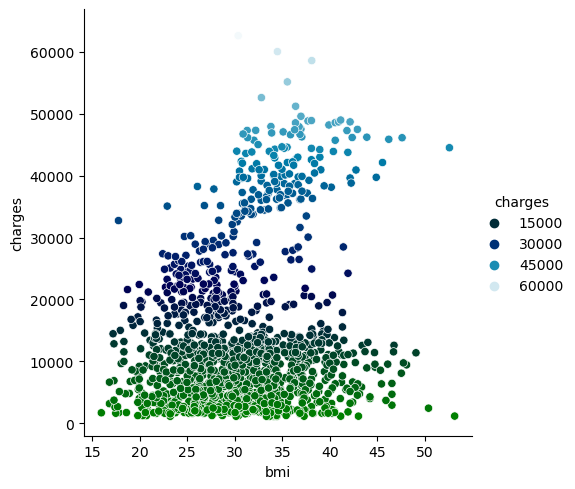

In [22]:
plt.figure(figsize = (10,12))
sns.relplot(x = 'bmi', y = 'charges', data = hf, hue = 'charges', palette = 'ocean')
plt.show()

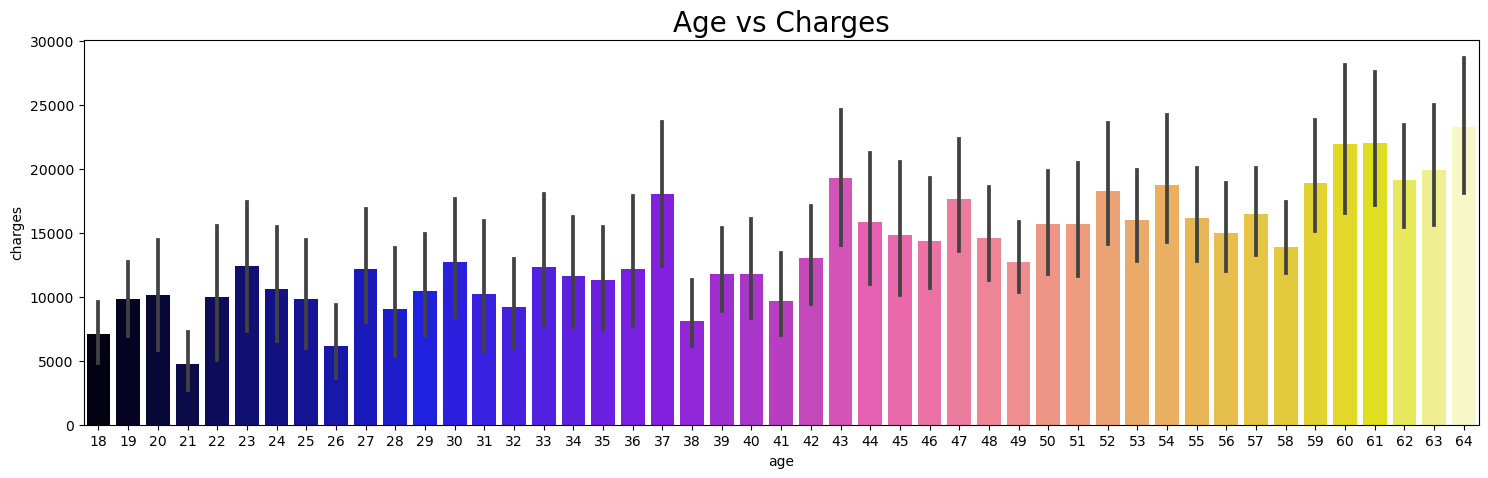

In [23]:
plt.figure(figsize = (18,5))
sns.barplot(x = 'age', y = 'charges', data = hf, palette = 'gnuplot2' )
plt.title('Age vs Charges', fontsize = 20)
plt.xticks(rotation = 0)
plt.show()

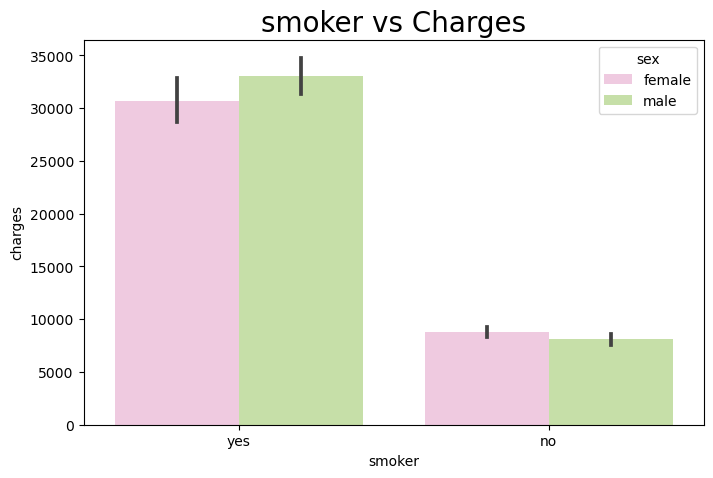

In [24]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'smoker', y = 'charges', data = hf, hue = 'sex', palette = 'PiYG' )
plt.title('smoker vs Charges', fontsize = 20)
plt.xticks(rotation = 0)
plt.show()

In [25]:
hf.skew()

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

#### Multivariate Analysis

<Figure size 1000x700 with 0 Axes>

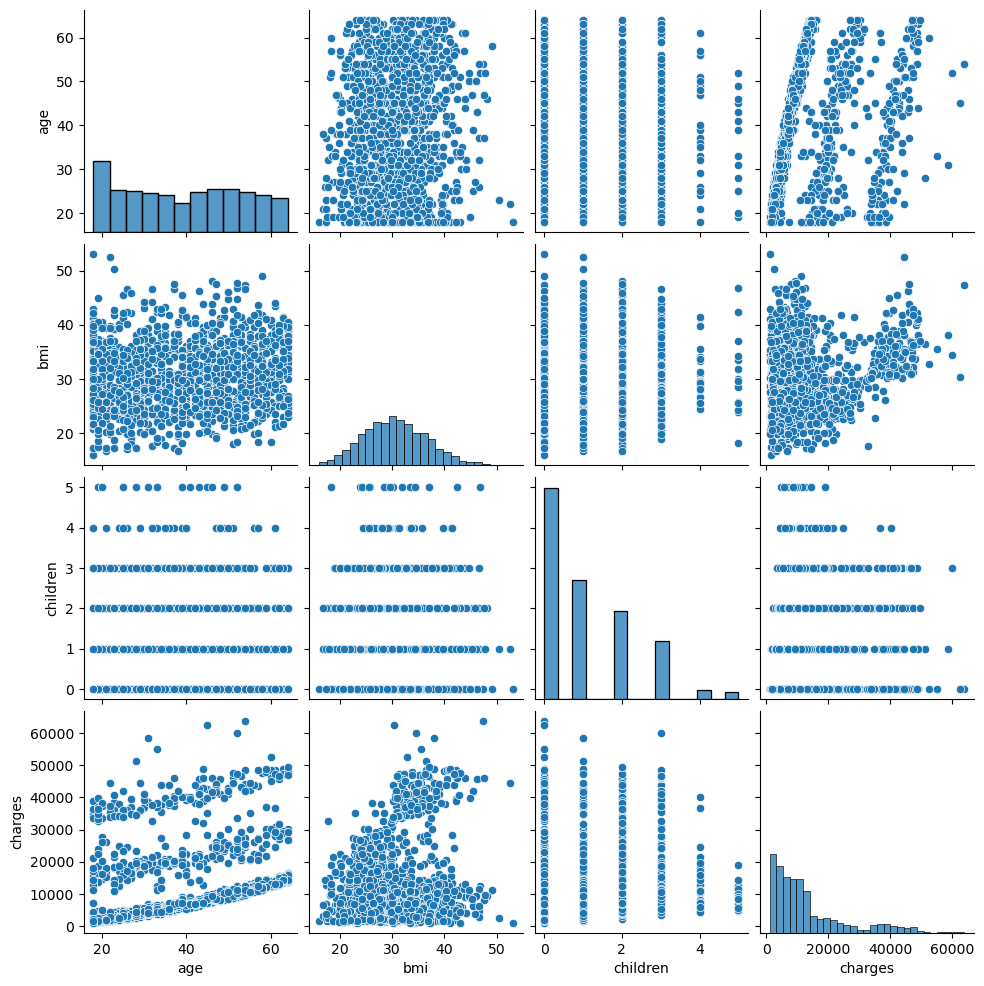

In [26]:
plt.figure(figsize = (10,7))
sns.pairplot(data = hf, palette = 'coolwarm')
plt.show()

From the above plot we can observe the relations betwen the columns, the diagonal of the plot gives us thhe distribution of the data among all the columns, we can say that only age, bmi and charges columns are correlated. And children column is not correlated, so We can drop the children column from our dataset

In [27]:
# To check correaltion between the columns of the dataset we need to encode the categorical data. We shall do that by using
# LabelEncoder method
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
hf['sex'] = lab.fit_transform(hf['sex'])
hf['smoker'] = lab.fit_transform(hf['smoker'])
hf['region'] = lab.fit_transform(hf['region'])
hf

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


#### Checking for the outliers

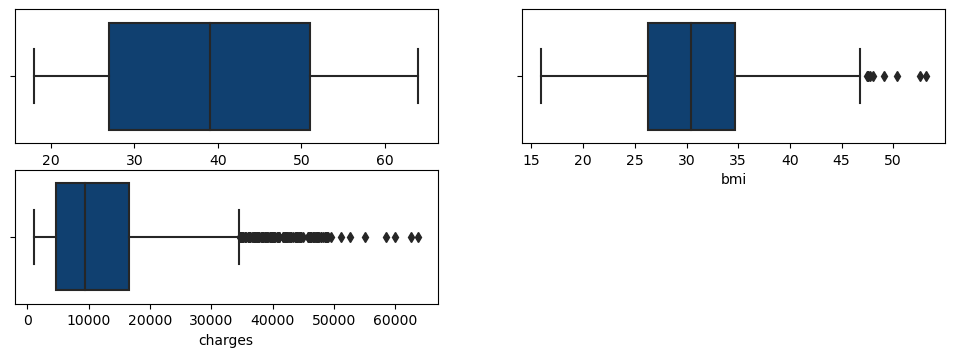

In [28]:
plt.figure(figsize = (12,8))
c = 1
for i in num:
    if c<=7:
        plt.subplot(4,2,c)
        sns.boxplot(hf[i], palette = 'ocean')
    c+=1
plt.show()

From the above boxplot we can see that there are outliers present in the bmi and charges columns, however charges column is based medical charges which might be low as well . So we can remove outliers using zscore method

In [29]:
from scipy.stats import zscore
z = np.abs(zscore(hf['bmi']))
z

0       0.453160
1       0.509422
2       0.383155
3       1.305052
4       0.292456
          ...   
1333    0.050269
1334    0.206053
1335    1.014490
1336    0.797524
1337    0.261299
Name: bmi, Length: 1337, dtype: float64

In [30]:
np.where(z>3)

(array([ 116,  846, 1046, 1316], dtype=int64),)

In [31]:
for i in z:
    if i>3:
        print(i)

3.0167243979459
3.2331821895290602
3.5939451755009926
3.6841359219939767


As we can see the zscores which are greater than are very near to default value. so not necessary to drop these values whose zscore is greater than 3

In [32]:
cor = hf.corr()
cor

,age,sex,bmi,smoker,region,charges
age,1.000000,-0.019814,0.109344,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.003746,0.157574,0.198401
smoker,-0.025587,0.076596,0.003746,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.787234,-0.006547,1.000000


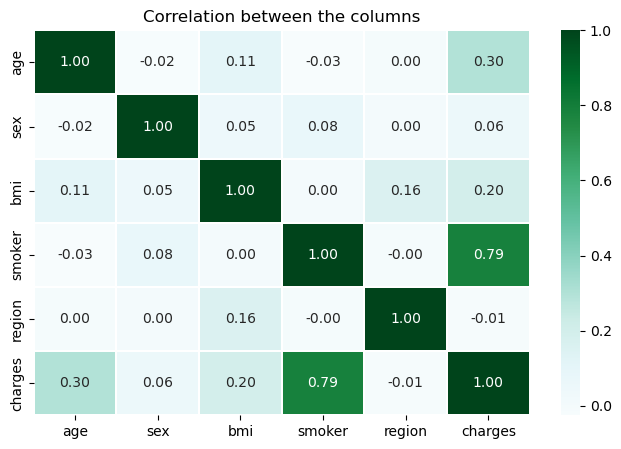

In [33]:
plt.figure(figsize = (8,5))
sns.heatmap(cor,cmap = 'BuGn', annot = True, linewidth = 0.2, fmt = '0.2f')
plt.title('Correlation between the columns')
plt.show()

From the above heatmap we can see that smoker, age,bmi columns are positively corelated to target (charges). And sex, children region column are almost non corelative with target variable. So we can remove these columns from our dataset

In [34]:
hf.corr().charges.sort_values()

region    -0.006547
sex        0.058044
bmi        0.198401
age        0.298308
smoker     0.787234
charges    1.000000
Name: charges, dtype: float64

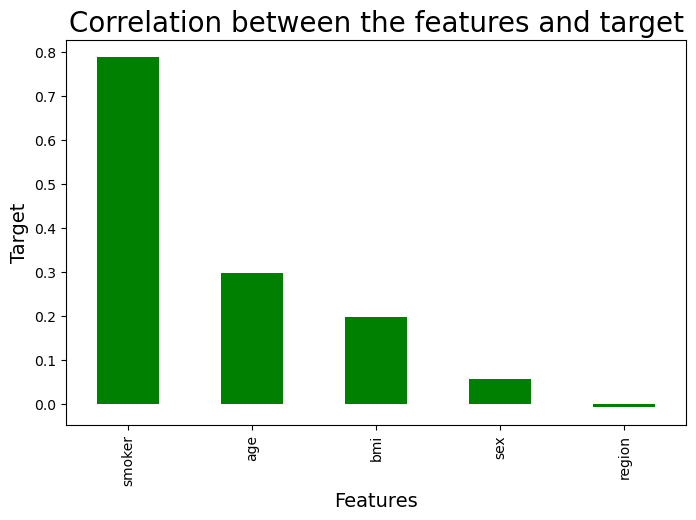

In [35]:
plt.figure(figsize = (8,5))
hf.corr()['charges'].sort_values(ascending = False).drop(['charges']).plot(kind = 'bar', color = 'green')
plt.xlabel('Features', fontsize = 14)
plt.ylabel('Target', fontsize = 14)
plt.title('Correlation between the features and target', fontsize = 20 )
plt.show()

From the above bar plot we can say that smoker, age and bmi are iimpacting the charges of the medical cost insurance and remaining sex, region and children doesnot have a bigger impact on the charges so we can remove these columns

In [36]:
hf.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.937421
smoker      1.463601
region     -0.039068
charges     1.515391
dtype: float64

In [37]:
hf.corr()

,age,sex,bmi,smoker,region,charges
age,1.000000,-0.019814,0.109344,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.003746,0.157574,0.198401
smoker,-0.025587,0.076596,0.003746,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.787234,-0.006547,1.000000


In [39]:
#### Standardisation of the features
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [98]:
hf1 = hf.copy() 
hf1.drop(['sex','children','region'], axis = 1, inplace = True)
hf1

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,0,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [99]:
age1 = hf1.age
age1 = age1.values.reshape(-1,1)
hf1.age = scale.fit_transform(age1)

bmi1 = hf1.bmi
bmi1 = bmi1.values.reshape(-1,1)
hf1.bmi = scale.fit_transform(bmi1)

hf1

,age,bmi,smoker,charges
0,-1.440418,-0.453160,1,16884.92400
1,-1.511647,0.509422,0,1725.55230
2,-0.799350,0.383155,0,4449.46200
3,-0.443201,-1.305052,0,21984.47061
4,-0.514431,-0.292456,0,3866.85520
...,...,...,...,...
1333,0.767704,0.050269,0,10600.54830
1334,-1.511647,0.206053,0,2205.98080
1335,-1.511647,1.014490,0,1629.83350
1336,-1.297958,-0.797524,0,2007.94500


In [100]:
x = hf1.drop('charges', axis = 1)
y = hf1['charges']

print(x.shape)
print(y.shape)

(1337, 3)
(1337,)


In [101]:
# Finding vif in each
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,1.012651,age
1,1.012136,bmi
2,1.000555,smoker


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [103]:
# Finding the best random state
maxAccu = 0
maxRs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = .30,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs = i
print('Maximum r2 score is', maxAccu,"on Random State", maxRs)

Maximum r2 score is 0.7962867340365076 on Random State 59


In [104]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRs)

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [106]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr =lr.predict(x_test)
pred_train = lr.predict(x_train)
print("R2 score on test data:", r2_score(y_test,pred_lr))
print("R2 score on train data:", r2_score(y_train,pred_train)*100)
print('mean_absolute_error:',mean_absolute_error(y_test,pred_lr))
print('Mean squared error:', mean_squared_error(y_test, pred_lr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred_lr)))

R2 score on test data: 0.7962867340365076
R2 score on train data: 72.18423821636237
mean_absolute_error: 4080.662807091324
Mean squared error: 33456095.924754642
Root mean squared error: 5784.124473483834


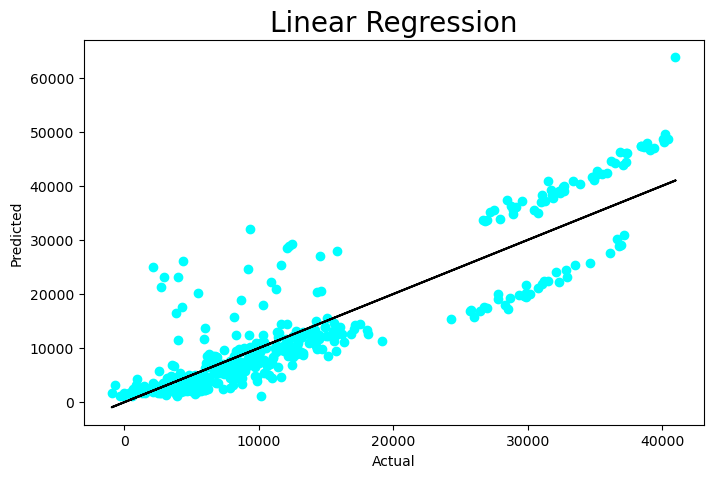

In [107]:
plt.figure(figsize = (8,5))
plt.scatter(x = pred_lr, y = y_test, color = 'cyan')
plt.plot(pred_lr, pred_lr, color = 'black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression', fontsize = 20)
plt.show()

In [108]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred_rf =rf.predict(x_test)
pred_train = rf.predict(x_train)
print("R2 score on test data:", r2_score(y_test,pred_lr))
print("R2 score on train data:", r2_score(y_train,pred_train)*100)
print('mean_absolute_error:',mean_absolute_error(y_test,pred_rf))
print('Mean squared error:', mean_squared_error(y_test, pred_rf))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred_rf)))

R2 score on test data: 0.7962867340365076
R2 score on train data: 96.78951094002105
mean_absolute_error: 2855.9976471525547
Mean squared error: 26485907.073611636
Root mean squared error: 5146.446062440725


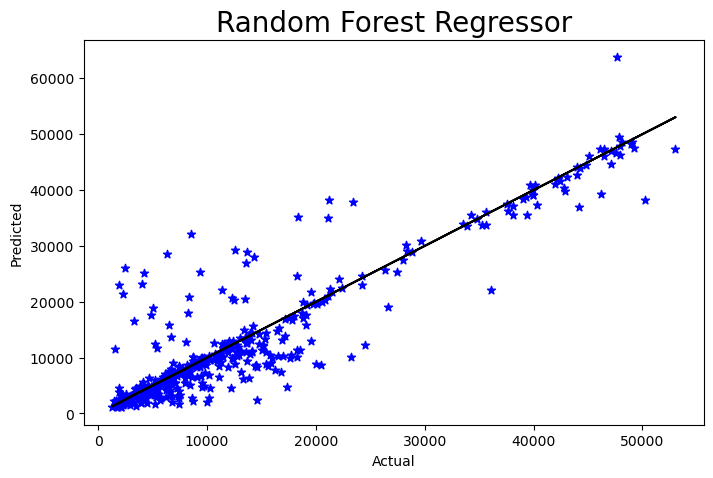

In [109]:
plt.figure(figsize = (8,5))
plt.scatter(x = pred_rf, y = y_test, color = 'blue',marker = '*')
plt.plot(pred_rf, pred_rf, color = 'black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor', fontsize = 20)
plt.show()

In [110]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_dt =dt.predict(x_test)
pred_train = dt.predict(x_train)
print("R2 score on test data:", r2_score(y_test,pred_dt))
print("R2 score on train data:", r2_score(y_train,pred_train)*100)
print('mean_absolute_error:',mean_absolute_error(y_test,pred_dt))
print('Mean squared error:', mean_squared_error(y_test, pred_dt))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred_dt)))

R2 score on test data: 0.7242332296357012
R2 score on train data: 99.53956805269695
mean_absolute_error: 3461.37431899005
Mean squared error: 45289537.12725405
Root mean squared error: 6729.750153404957


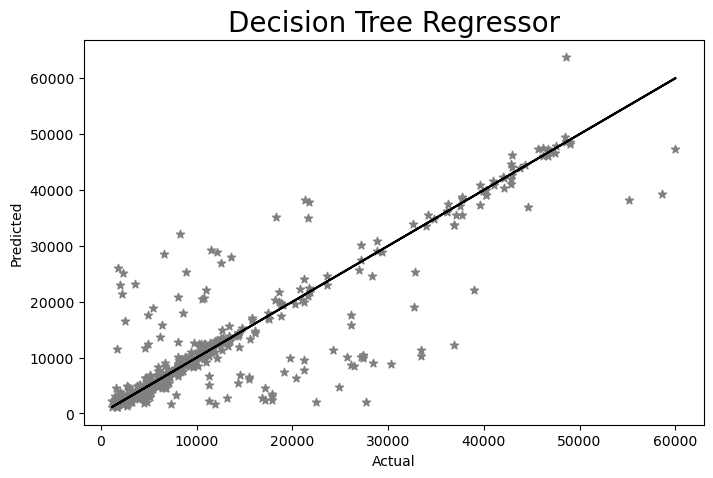

In [111]:
plt.figure(figsize = (8,5))
plt.scatter(x = pred_dt, y = y_test, color = 'grey',marker = '*')
plt.plot(pred_dt, pred_dt, color = 'black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regressor', fontsize = 20)
plt.show()

In [112]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn =knn.predict(x_test)
pred_train = knn.predict(x_train)
print("R2 score on test data:", r2_score(y_test,pred_knn))
print("R2 score on train data:", r2_score(y_train,pred_train)*100)
print('mean_absolute_error:',mean_absolute_error(y_test,pred_knn))
print('Mean squared error:', mean_squared_error(y_test, pred_knn))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred_knn)))

R2 score on test data: 0.8167195700639767
R2 score on train data: 87.57809591409219
mean_absolute_error: 3044.3786785218904
Mean squared error: 30100384.55801283
Root mean squared error: 5486.381736446419


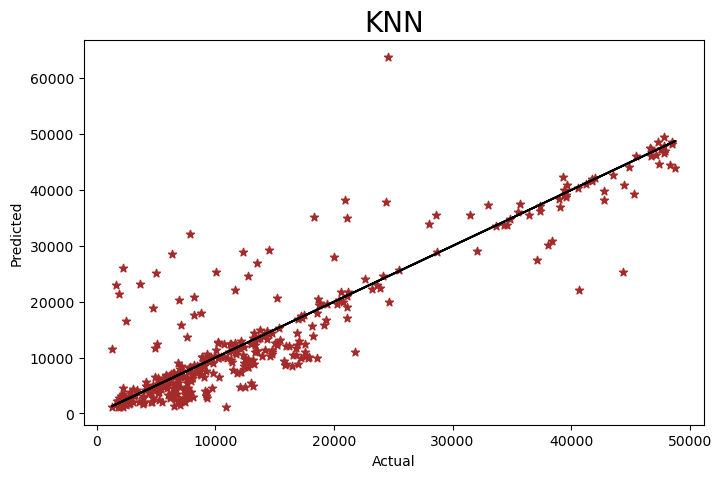

In [113]:
plt.figure(figsize = (8,5))
plt.scatter(x = pred_knn, y = y_test, color = 'brown',marker = '*')
plt.plot(pred_knn, pred_knn, color = 'black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNN', fontsize = 20)
plt.show()

In [114]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr =gbr.predict(x_test)
pred_train = gbr.predict(x_train)
print("R2 score on test data:", r2_score(y_test,pred_gbr))
print("R2 score on train data:", r2_score(y_train,pred_train)*100)
print('mean_absolute_error:',mean_absolute_error(y_test,pred_gbr))
print('Mean squared error:', mean_squared_error(y_test, pred_gbr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred_gbr)))

R2 score on test data: 0.8752217218187812
R2 score on train data: 89.09094502085637
mean_absolute_error: 2530.672104438996
Mean squared error: 20492499.712339338
Root mean squared error: 4526.8642250833345


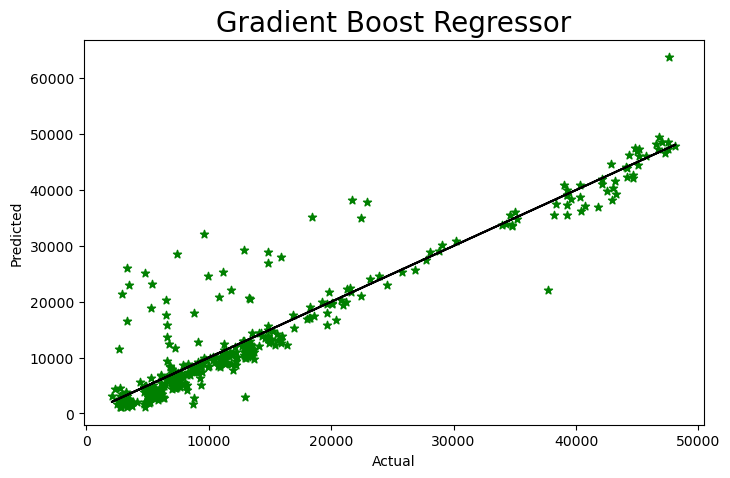

In [115]:
plt.figure(figsize = (8,5))
plt.scatter(x = pred_gbr, y = y_test, color = 'green',marker = '*')
plt.plot(pred_gbr, pred_gbr, color = 'black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boost Regressor', fontsize = 20)
plt.show()

In [116]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
pred_svr =svr.predict(x_test)
pred_train = svr.predict(x_train)
print("R2 score on test data:", r2_score(y_test,pred_svr))
print("R2 score on train data:", r2_score(y_train,pred_train)*100)
print('mean_absolute_error:',mean_absolute_error(y_test,pred_svr))
print('Mean squared error:', mean_squared_error(y_test, pred_svr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred_svr)))

R2 score on test data: -0.10958974492343687
R2 score on train data: -9.657138499453044
mean_absolute_error: 8830.02499015907
Mean squared error: 182229374.05527288
Root mean squared error: 13499.236054505931


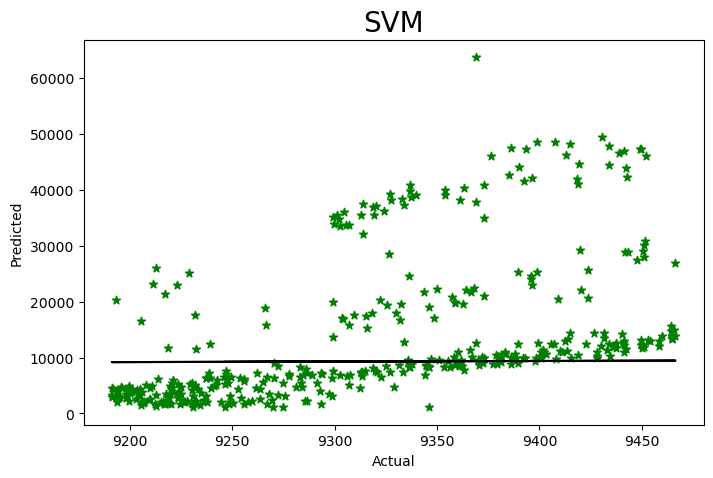

In [117]:
plt.figure(figsize = (8,5))
plt.scatter(x = pred_svr, y = y_test, color = 'green',marker = '*')
plt.plot(pred_svr, pred_svr, color = 'black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVM', fontsize = 20)
plt.show()

In [118]:
from sklearn.ensemble import ExtraTreesRegressor
exr =ExtraTreesRegressor()
exr.fit(x_train,y_train)
pred_exr =exr.predict(x_test)
pred_train = exr.predict(x_train)
print("R2 score on test data:", r2_score(y_test,pred_exr))
print("R2 score on train data:", r2_score(y_train,pred_train)*100)
print('mean_absolute_error:',mean_absolute_error(y_test,pred_exr))
print('Mean squared error:', mean_squared_error(y_test, pred_exr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred_exr)))

R2 score on test data: 0.8007723584689632
R2 score on train data: 99.53956805269695
mean_absolute_error: 3023.5225569766917
Mean squared error: 32719415.96144998
Root mean squared error: 5720.088807129657


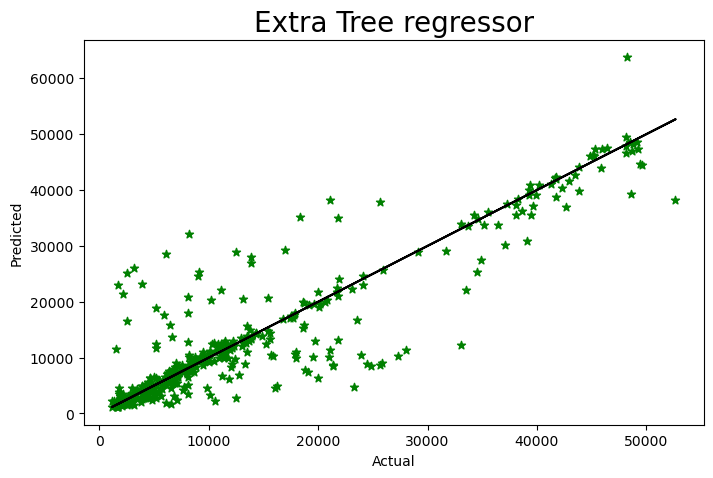

In [119]:
plt.figure(figsize = (8,5))
plt.scatter(x = pred_exr, y = y_test, color = 'green',marker = '*')
plt.plot(pred_exr, pred_exr, color = 'black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Extra Tree regressor', fontsize = 20)
plt.show()

In [120]:
from sklearn.model_selection import cross_val_score as cvs

In [121]:
score = cvs(lr,x,y)
print(score)
print(score.mean()*100)
print("Difference between the r2 score and  validation score : ", (r2_score(y_test, pred_lr)-score.mean())*100)

[0.76170322 0.70980997 0.77139554 0.72830637 0.75328972]
74.49009660975673
Difference between the r2 score and  validation score :  5.138576793894034


In [122]:
score1 = cvs(rf,x,y)
print(score1)
print(score1.mean()*100)
print("Difference between the r2 score and  validation score : ", (r2_score(y_test, pred_rf)-score1.mean())*100)

[0.8316372  0.74638849 0.84164675 0.80625526 0.81798555]
80.87826482647414
Difference between the r2 score and  validation score :  2.9945377739668766


In [123]:
score2 = cvs(knn,x,y)
print(score2)
print(score2.mean()*100)
print("Difference between the r2 score and  validation score : ", (r2_score(y_test, pred_knn)-score2.mean())*100)

[0.86461722 0.76345671 0.85111463 0.79085356 0.83367174]
82.07427731195877
Difference between the r2 score and  validation score :  -0.4023203055610991


In [124]:
score3 = cvs(gbr,x,y)
print(score3)
print(score3.mean()*100)
print("Difference between the r2 score and  validation score : ", (r2_score(y_test, pred_gbr)-score3.mean())*100)

[0.87423573 0.78521334 0.88875321 0.84125398 0.8550592 ]
84.89030920532556
Difference between the r2 score and  validation score :  2.631862976552557


In [125]:
score4 = cvs(dt,x,y)
print(score4)
print(score4.mean()*100)
print("Difference between the r2 score and  validation score : ", (r2_score(y_test, pred_dt)-score4.mean())*100)

[0.67955296 0.63796275 0.73849275 0.73190471 0.71261301]
70.01052351725464
Difference between the r2 score and  validation score :  2.4127994463154834


In [126]:
score5 = cvs(svr,x,y)
print(score5)
print(score5.mean()*100)
print("Difference between the r2 score and  validation score : ", (r2_score(y_test, pred_svr)-score5.mean())*100)

[-0.11175321 -0.10645401 -0.07832178 -0.10015369 -0.10429164]
-10.019486485710036
Difference between the r2 score and  validation score :  -0.9394880066336514


In [127]:
score6 = cvs(exr,x,y)
print(score6)
print(score6.mean()*100)
print("Difference between the r2 score and  validation score : ", (r2_score(y_test, pred_exr)-score6.mean())*100)

[0.76245098 0.70944297 0.8076554  0.78036867 0.78215937]
76.84154791245238
Difference between the r2 score and  validation score :  3.2356879344439426


In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
param = {'n_neighbors':[2,3,5],
        'weights': ['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size':[10,15,20,25,30],
        'p':[1,2,3],
        'metric':[ 'minkowski']
#         'metric_params':['dict'],
#         'n_jobs':['int']
        }
gscv = GridSearchCV(KNN(),param, cv = 5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 15, 20, 25, 30],
                         'metric': ['minkowski'], 'n_neighbors': [2, 3, 5],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']})

In [130]:
gscv.best_params_

{'algorithm': 'auto',
 'leaf_size': 25,
 'metric': 'minkowski',
 'n_neighbors': 5,
 'p': 1,
 'weights': 'uniform'}

In [131]:
Model = KNN(algorithm = 'auto',leaf_size = 25, metric = 'minkowski',n_neighbors = 5,p = 1,weights = 'uniform')

In [132]:
Model.fit(x_train,y_train)
pred = Model.predict(x_test)
print("R2 score:", r2_score(y_test,pred))
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print('Mean squared error:', mean_squared_error(y_test, pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred)))

R2 score: 0.8256534540168069
mean_absolute_error: 3043.109972655721
Mean squared error: 28633161.119750943
Root mean squared error: 5350.9962735691515


In [133]:
import joblib
import pickle
filename = 'Insurancecost.pkl'
pickle.dump(Model,open(filename,'wb'))

In [134]:
loaded_model = pickle.load(open('Insurancecost.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

82.56534540168069
